* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.

* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price .


# Ejercicio 1: Preparación del ambiente de trabajo
* Importe las librerías clásicas a utilizar.
* Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor .
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import lec7_graphs as afx

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns= 'Unnamed: 0')

In [3]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


# Ejercicio 2: Feature engineering
Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object' , realice lo siguiente:

1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan
eliminar una de las categorías, no se concentren en especificar la categoría a eliminar.
Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.


2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos.
tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento
artificial del desempeño del modelo.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MS_SubClass         2930 non-null   object 
 1   MS_Zoning           2930 non-null   object 
 2   Lot_Frontage        2930 non-null   int64  
 3   Lot_Area            2930 non-null   int64  
 4   Street              2930 non-null   object 
 5   Alley               2930 non-null   object 
 6   Lot_Shape           2930 non-null   object 
 7   Land_Contour        2930 non-null   object 
 8   Utilities           2930 non-null   object 
 9   Lot_Config          2930 non-null   object 
 10  Land_Slope          2930 non-null   object 
 11  Neighborhood        2930 non-null   object 
 12  Condition_1         2930 non-null   object 
 13  Condition_2         2930 non-null   object 
 14  Bldg_Type           2930 non-null   object 
 15  House_Style         2930 non-null   object 
 16  Overal

In [5]:
for index, (colnames, serie) in enumerate(df.iteritems()):
    if np.dtype(df[colnames]) == object:
        df=pd.concat([df,pd.get_dummies(df[colnames],drop_first=True,prefix=colnames)],axis=1)
        df=df.drop(columns = colnames)




# Ejercicio 3: Primer modelo

* Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.

* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.

* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño. 

* Comente sobre el desempeño

In [6]:
y=df["Sale_Price"]
X=df.drop(columns='Sale_Price')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1125)

In [8]:
d_tree=DecisionTreeRegressor()
d_tree.fit(X_train,y_train)
y_predict=d_tree.predict(X_test)

In [9]:
print("Test MSE:", mean_squared_error(y_test,y_predict).round(5))
print("Test MAE:", median_absolute_error(y_test,y_predict).round(5))
print("Test R2:", r2_score(y_test, y_predict).round(5))

Test MSE: 1477112777.64619
Test MAE: 16000.0
Test R2: 0.72085


En general, este primer modelo entrega valores altos de MSE y MAE, los cuales podrían provenir de la alta cantidad de variables que se están utilizando para la predicción. Sin embargo, el valor de  𝑅2  da relativamente bueno, por lo que podemos decir que nuestros datos si explican en gran medida el comportamiento de la variable Sale_Price.

# Ejercicio 4: Importancia relativa

* Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.

* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price .

* Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.


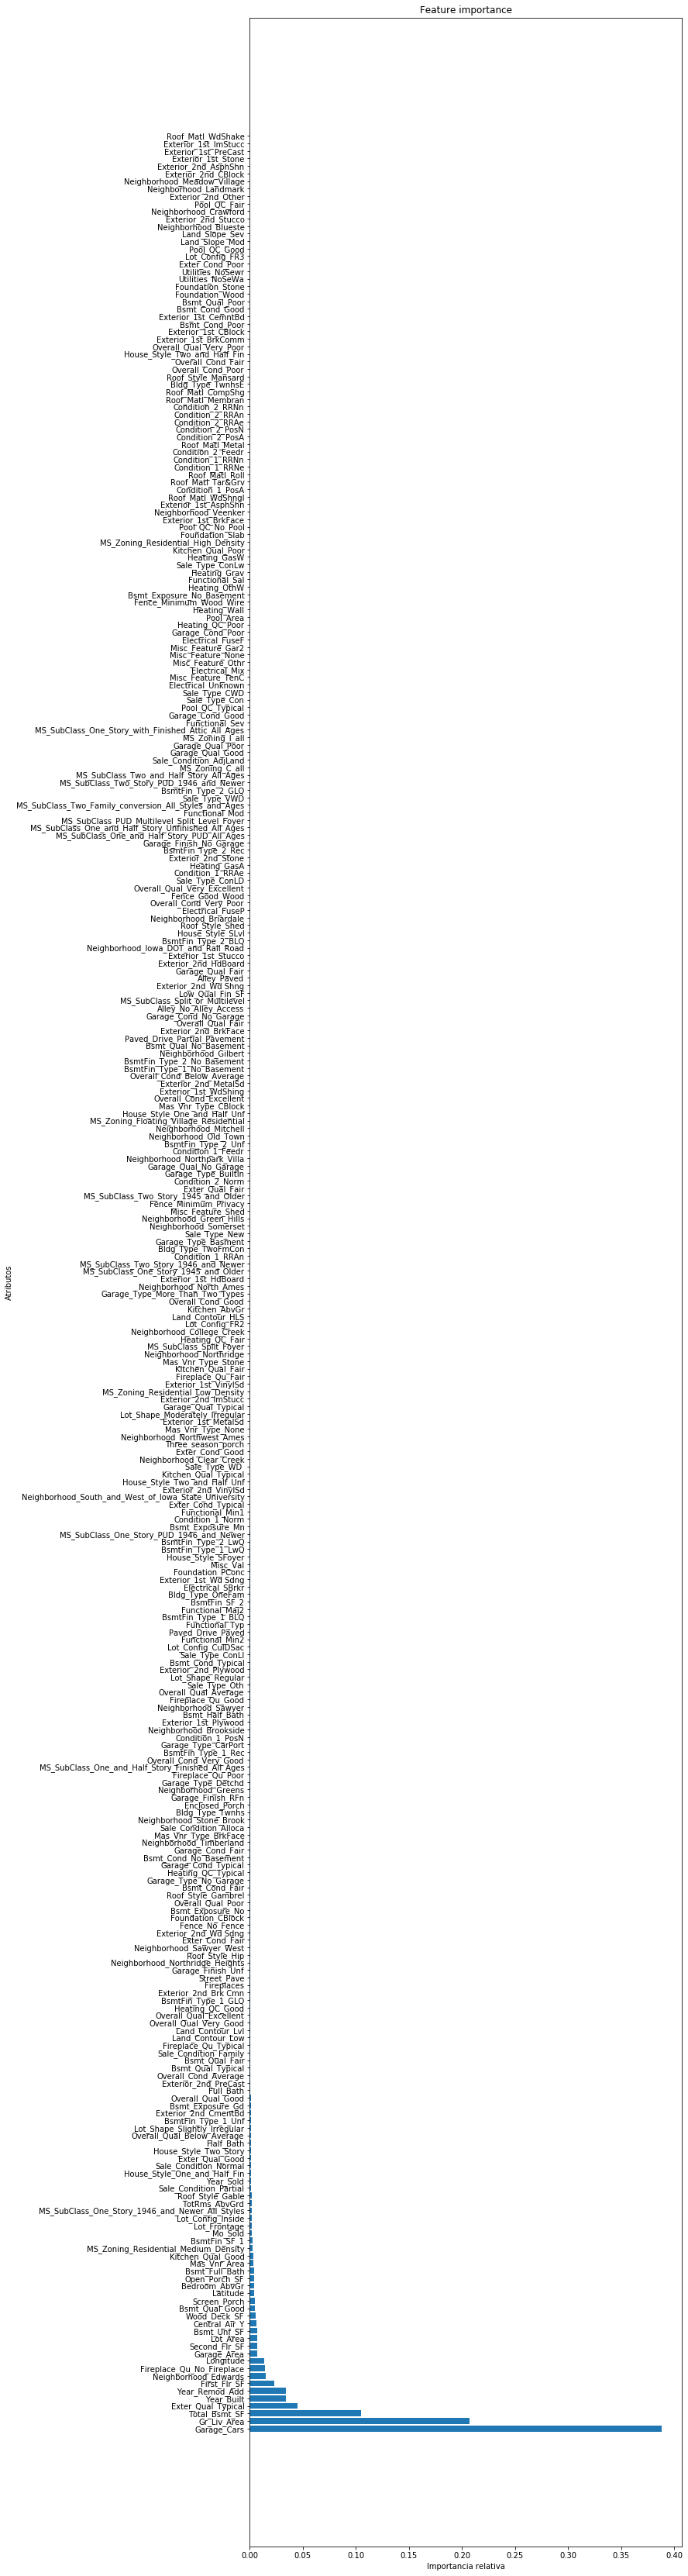

In [10]:
Importancia=d_tree.feature_importances_
plt.rcParams['figure.figsize'] = (10, 60)
afx.plot_importance(d_tree, X.columns)
plt.xlabel("Importancia relativa");
plt.ylabel('Atributos');

Los principales atributos que afectan la predicción de Sale_Price son Garage_cars, Gr_Liv_Area, Total_Bsmt_SF, Typical,
Year_Remod_Add, Year_built, Firt_FLR_SF, Longitude, Fireplaces, Lot Area.

In [11]:
columns=['Garage_Cars', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'Exter_Qual_Typical', 'Year_Remod_Add', 'Year_Built', 'Fireplaces', 'First_Flr_SF', 'Longitude', 'Second_Flr_SF']
df2=y
for col in columns:
    df2=pd.concat([df2,df[col]],axis=1)

In [12]:
df2

,Sale_Price,Garage_Cars,Gr_Liv_Area,Total_Bsmt_SF,Exter_Qual_Typical,Year_Remod_Add,Year_Built,Fireplaces,First_Flr_SF,Longitude,Second_Flr_SF
0,215000,2,1656,1080,1,1960,1960,2,1656,-93.619754,0
1,105000,1,896,882,1,1961,1961,0,896,-93.619756,0
2,172000,1,1329,1329,1,1958,1958,0,1329,-93.619387,0
3,244000,2,2110,2110,0,1968,1968,2,2110,-93.617320,0
4,189900,2,1629,928,1,1998,1997,1,928,-93.638933,701
...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,2,1003,1003,1,1984,1984,0,1003,-93.604776,0
2926,131000,2,902,864,1,1983,1983,0,902,-93.602680,0
2927,132000,0,970,912,1,1992,1992,0,970,-93.606847,0
2928,170000,2,1389,1389,1,1975,1974,1,1389,-93.600190,0


# Ejercicio 5: Refactorización del modelo y pickling

* En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.

* Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:

  - Máximo de atributos: Evalúe todos los posibles atributos.
  - Máximo de profundidad: entre 1 a 32.
  - Validaciones cruzadas : 5.
* Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.


In [13]:
y=df2["Sale_Price"]
X=df2.drop(columns='Sale_Price')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1125)

In [14]:
dec_tree_grid_cv = GridSearchCV(DecisionTreeRegressor(),
                                 {# con una profundidad de ramas hasta 32
                                 'max_depth': np.linspace(1, 32, 32),
                                 # evaluando todos los atributos en lamatriz
                                 'max_features':list(range(1,X_train.shape[1]))},
                                # Con 5 validaciones cruzadas
                                cv=5,
                                # Ocupando todos los núcleos del computador
                                n_jobs=-1).fit(X_train, y_train)

In [15]:
dec_tree_grid_cv.best_params_

{'max_depth': 9.0, 'max_features': 4}

In [16]:
y_predict= dec_tree_grid_cv.best_estimator_.predict(X_test)

la mejor combinación se optiene con una profundidad de ramas de 6.0 y con 6 atributos.

In [17]:
print("Test MSE:", mean_squared_error(y_test,y_predict).round(5))
print("Test MAE:", median_absolute_error(y_test,y_predict).round(5))
print("Test R2:", r2_score(y_test, y_predict).round(5))

Test MSE: 1288385434.78164
Test MAE: 16729.77193
Test R2: 0.75652


EL mean squared error se redujo a 17071103926.2 y el error absoluto medio se redujo a 16020.2 por lo que se aprecia una mejora en el modelo. Esto significa que tenemos un mejor ajuste al comportamiento de los datos en nuestro segundo modelo. Adicionalmente, tenemos un aumento de %0.07% en el valor  𝑅2 , mejorando la capacidad de explicación de nuestro modelo con respecto a la variable objetivo 'Sale_Price'. En resumen, el nuevo modelo es mejor que el primero obtenido para predecir los precios de inmuebles en la ciudad de Ames, Iowa.

In [18]:
import pickle

In [19]:
best_model=dec_tree_grid_cv.best_estimator_

In [20]:
pickle_out= open('Francisco-Navarro-actividad07.sav','wb')
pickle.dump(best_model,pickle_out)
pickle.dump(X_train, pickle_out)
pickle.dump(y_train, pickle_out)
pickle.dump(X_test, pickle_out)
pickle.dump(y_test, pickle_out)
pickle_out.close()